# **Practice Assignment - Part 1: Analyzing wildfire activities in Australia** 




### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

# Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


---


### Importing Data


In [2]:

df = pd.read_csv("Historical_Wildfires.csv")
print('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


Let's look at some samples rows from the dataset we loaded:


In [3]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


---


Let's verify the column names and the data type of each variable


In [4]:
#Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [5]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns


In [6]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


**Verify the columns again**


In [7]:
#verify the columns again
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

### TASK 1.1: Let's try to understand the change in average estimated fire area over time <br>(use pandas to plot)


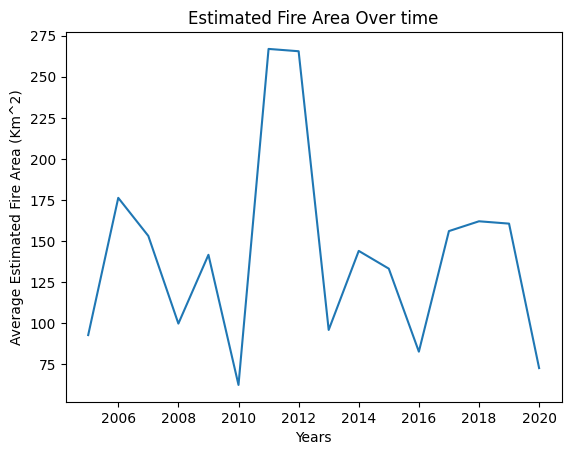

In [10]:
# TODO
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.ylabel('Average Estimated Fire Area (Km^2)')
plt.xlabel('Years')
plt.title('Estimated Fire Area Over time')
plt.show()

### TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.


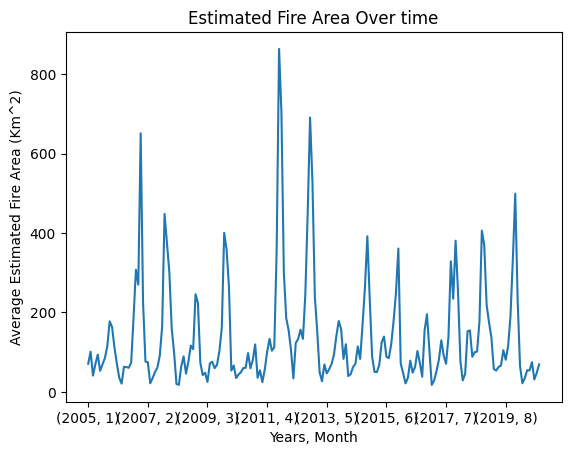

In [11]:
# TODO
# TODO
df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.ylabel('Average Estimated Fire Area (Km^2)')
plt.xlabel('Years, Month')
plt.title('Estimated Fire Area Over time')
plt.show()

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia


---


### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot


before starting with the plot, why not know the regions mentioned in the dataset?. <br>Make use of unique() to identify the regions in the dataset (apply it on series only)


In [12]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

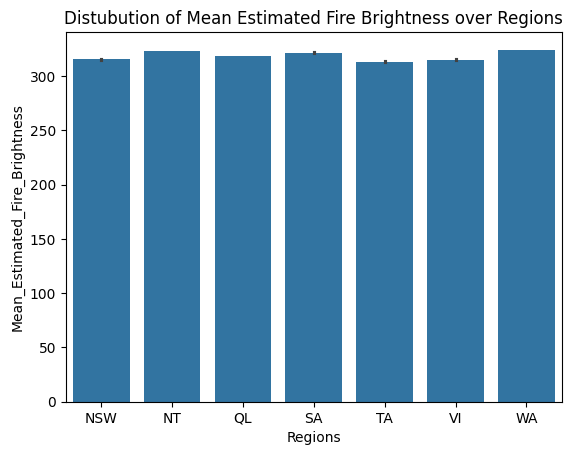

In [15]:
#TODO

fig = plt.Figure((12,6))
fig = sns.barplot(data=df,x='Region',y='Mean_estimated_fire_brightness')
plt.title("Distubution of Mean Estimated Fire Brightness over Regions")
plt.xlabel('Regions')
plt.ylabel('Mean_Estimated_Fire_Brightness')
plt.show()

### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions<br> we will develop a pie chart for this


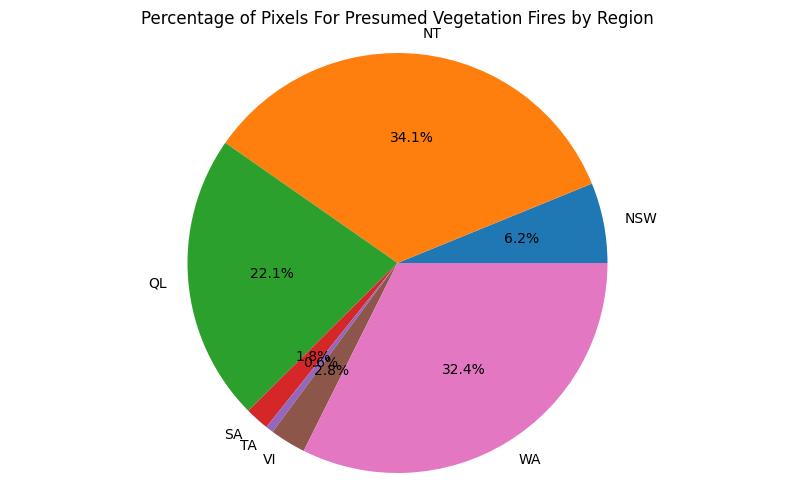

In [17]:
plt.figure(figsize=(10,6))
region_counts  = df.groupby('Region')['Count'].sum()
plt.pie(region_counts,labels=region_counts.index,autopct='%1.1f%%')
plt.title('Percentage of Pixels For Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()


### TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI 




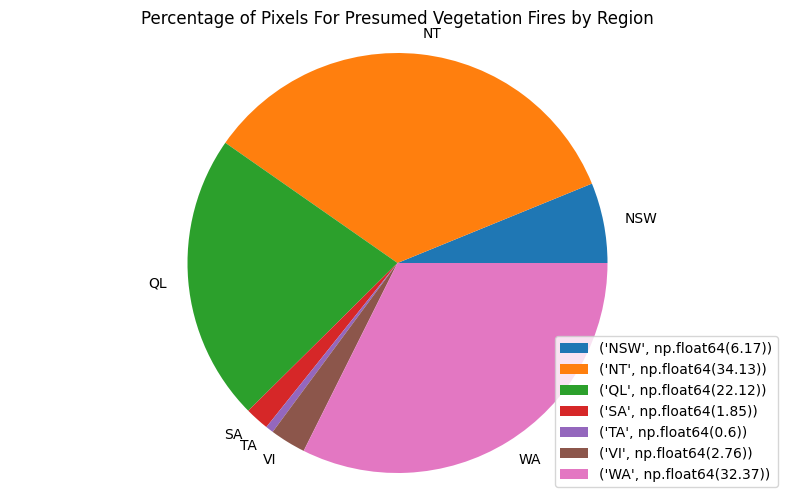

In [19]:
#TODO
plt.figure(figsize=(10,6))
region_counts  = df.groupby('Region')['Count'].sum()
plt.pie(region_counts,labels=region_counts.index)
plt.title('Percentage of Pixels For Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index,region_counts)])
plt.axis('equal')
plt.show()


### TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness<br> Using Matplotlib to create the histogram


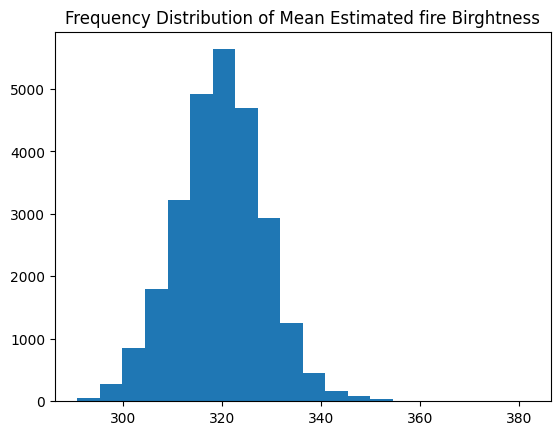

In [21]:
#TODO
plt.Figure(figsize=(12,6))
plt.hist(x=df['Mean_estimated_fire_brightness'],bins=20)
plt.title('Frequency Distribution of Mean Estimated fire Birghtness')
plt.show()

### TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue


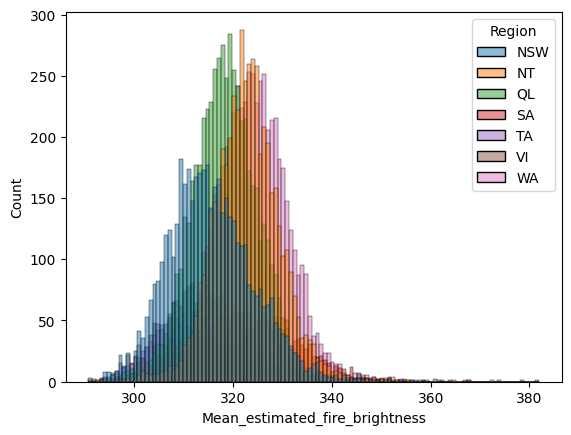

In [22]:
sns.histplot(data=df,x='Mean_estimated_fire_brightness',hue='Region')
plt.show()

### looks better!, now include the parameter `multiple='stack'` in the histplot() and see the difference. Include labels and titles as well


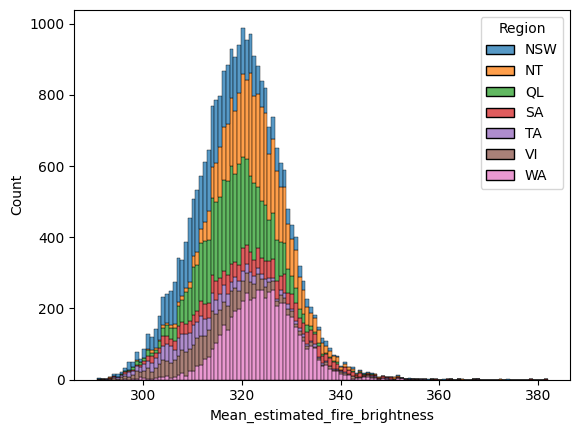

In [23]:
sns.histplot(data=df,x='Mean_estimated_fire_brightness',hue='Region',multiple='stack')
plt.show()

### TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?


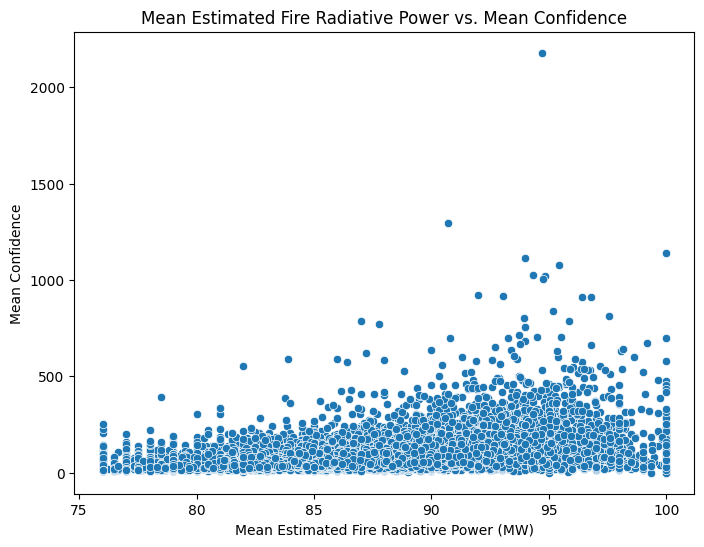

In [25]:
 # Creating a scatter plot to visualize the relationship between mean estimated fire radiative power and mean  confidence using Seaborn
plt.figure(figsize=(8, 6))
# Using sns.scatterplot to create the scatter plot
# Specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis            (y='Mean_estimated_fire_radiative_power')
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

### TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium



In [26]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [30]:
aus_reg = folium.map.FeatureGroup()
Aus_map = folium.Map(location=[-25,125],zoom_start=4)
for lat, lng, lab in zip(reg.Lat, reg.Lon,reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat,lng],
            popup=lab,
            radius=5,
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
Aus_map.add_child(aus_reg)